# WeatherPy
----

### Analysis - Isaac's observations
* There are more data points on the Northern hemosphere (>0 Degrees) than the southern, and there are no data points below -60 degrees. This makes sense as there is very little land mass (aside from Antartica) south of -40 degrees and very few cities/towns.  
* The norm for humidity appears to be greater than 50%. I hadn't expected as many low humidity locations south of the equator as there are, had forgotten that Austrailia has water problems as does Africa outside of the Sahara.
* While most wind speeds are in a range below 5mph it appears that the stronger winds (above 11 mph) are all outside the -40 to 40 degree ranges with the highest winds being at the outside edges of the chart..

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
#pip install citipy, not sure why but it makes it not break.
!pip install citipy

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
metro =[]
country=[]
lat = []
lon =[]
temp = []
humidity =[]
cloudiness =[]
wind =[]
date =[]

x = 0
y = 1
# Loop through the list of cities and perform a request for data on each
# Added to the if statement that the response needed to not be an error (200) and
# humidity cannot be over 100% - even if it feels like it in Florida/Louisana some times. 
print("---------Beginning------------")
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod']==200 and response['main']['humidity']<=100:
        metro.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all']) 
        wind.append(response['wind']['speed'])
        date.append(response['dt'])

        if x<= 50:
            x=x + 1 
        elif x>50:
            x=0 
            y=y+1


    print( "Processing Record "+str(x)+" of Set "+str(y)+" | "+city)           
    print(query_url+city)

---------Beginning------------
Processing Record 1 of Set 1 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=f51adc78ad7ef1dc7ba8d123538506f7&units=metric&q=aklavik
Processing Record 2 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=f51adc78ad7ef1dc7ba8d123538506f7&units=metric&q=cidreira
Processing Record 3 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=f51adc78ad7ef1dc7ba8d123538506f7&units=metric&q=punta arenas
Processing Record 3 of Set 1 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=f51adc78ad7ef1dc7ba8d123538506f7&units=metric&q=tsihombe
Processing Record 4 of Set 1 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=f51adc78ad7ef1dc7ba8d123538506f7&units=metric&q=coihaique
Processing Record 5 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=f51adc78ad7ef1dc7ba8d123538506f7&units=metric&q=mataura
Processing Record 6 of Set 1 | santa cruz
http://api.openweathe

In [67]:
from time import gmtime, strftime
dates=strftime("%b %d %Y", gmtime())

weather_dict = {
    "city":metro,
    "country":country,
    "lat": lat,
    "lon":lon,
    "temp": temp,
    "humidity":humidity,
    "cloudiness":cloudiness,
    "wind speed":wind,
    "date":date
}
weather_data = pd.DataFrame(weather_dict)
#weather_data.head()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
weather_data.to_csv("output/RawData.csv", index=False)
weather_data.head()

,city,country,lat,lon,temp,humidity,cloudiness,wind speed,date
0,Aklavik,CA,68.22,-135.01,-11.00,61,20,1.50,1554577200
1,Cidreira,BR,-30.17,-50.22,20.96,94,92,3.62,1554581489
2,Punta Arenas,CL,-53.16,-70.91,8.42,57,40,23.70,1554580949
3,Coihaique,CL,-45.58,-72.07,16.43,55,20,4.60,1554577320
4,Mataura,NZ,-46.19,168.86,3.33,93,0,1.32,1554581405



### Plotting the latitude and longitude for  plot group.
* Not part of the homework, just curious if the randomly generated data was grouped together.

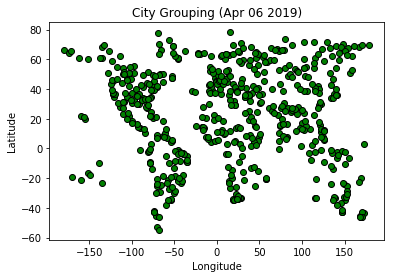

In [69]:
# This is not part of the homework. I was just curious if there were clusters or groupings for the data. 
# By putting the lat at the y-axis when plotting instead of they x the it looks like a map of the world. Seemed to get a lot of New Zealand.
# Should be able to overlay this on a map to see any groupings or clusters.



plt.title("City Grouping ("+(str(dates)+")"))
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(lon, lat,  marker="o", color="Green",edgecolor = "black")

plt.savefig("output/Lat_Long.png")

plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

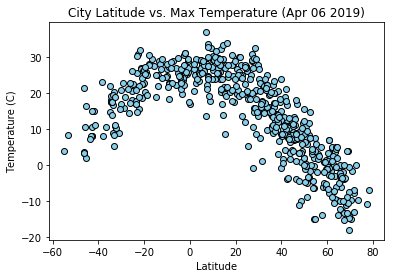

In [70]:
plt.title("City Latitude vs. Max Temperature ("+(str(dates)+")"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

plt.scatter(lat, temp, marker="o", color="skyblue",edgecolor = "black")

plt.savefig("output/Lat_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

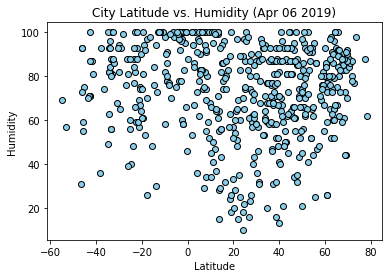

In [71]:
plt.title("City Latitude vs. Humidity ("+(str(dates)+")"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(lat, humidity, marker="o", color="skyblue",edgecolor = "black")

plt.savefig("output/Lat_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

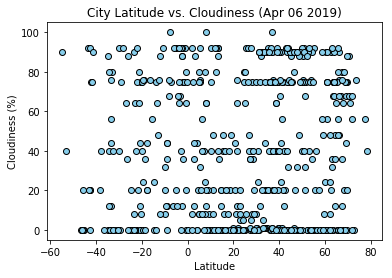

In [72]:
plt.title("City Latitude vs. Cloudiness ("+(str(dates)+")"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(lat, cloudiness, marker="o", color="skyblue",edgecolor = "black")

plt.savefig("output/Lat_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

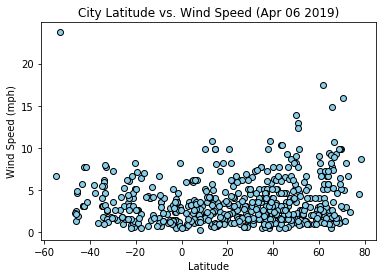

In [73]:
plt.title("City Latitude vs. Wind Speed ("+(str(dates)+")"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(lat, wind, marker="o", color="skyblue",edgecolor = "black")

plt.savefig("output/Lat_wind.png")

plt.show()